In [50]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip, ImageSequenceClip, CompositeVideoClip, clips_array
import sys
%matplotlib inline

In [13]:
volume = np.genfromtxt("./Assignment2Start/volumeData", skip_header=1)

In [15]:
volume = volume.reshape((256,128,256))

[MoviePy] >>>> Building video man.mp4
[MoviePy] Writing video man.mp4


100%|█████████▉| 256/257 [00:01<00:00, 238.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: man.mp4 


[MoviePy] Building file man.gif with imageio


100%|█████████▉| 256/257 [00:02<00:00, 96.18it/s] 


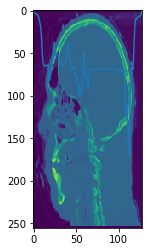

In [126]:
im = plt.plot(volume[125,:,200])
plt.imshow(volume[:,:,200])

slices = []
plots = []
rays = []
stds = []

pos = 80
for i in range(256):
    # I want to see the variation of intensity 
    plot = np.zeros((256,128,3))
    
    # The line that represents the ray over which I will analyze the intensity
    ray = np.zeros((256,128,1))
    ray[pos,:] = 255;
    
    # This is the line to analyze the variation of intensity
    line = volume[pos,:,i]
    
    # I want to analyse the std throughout the ray
    std =  np.zeros((256,128,1))
    values = []
        
    # acc_opacity
    acc_opacity = 0
    intensities = []
    for j in range(128):        
        # actual value of intensity
        index = (int)(line[j])
        plot[index, j, 0] = 255
        
        # std of intensities up to now
        values.append(index)
        acc_std = int(np.round(np.std(values)))
        #plot[acc_std, j, 1] = 255
        
        # average of intensities up to now
        acc_mean = int(np.round(np.mean(values)))
        #plot[acc_mean, j, 2] = 255
        
        # accumulated intenstiy up to now
        acc_int = int(np.round(np.sum(values)))
        if acc_int > 255:
            acc_int = 255
            
        #plot[acc_int, j, 0] = 255
        #plot[acc_int, j, 1] = 255
        
        # accumulated opacity as per formula
        alpha_cur = index / 255.0
        acc_opacity = alpha_cur + (1 - alpha_cur) * acc_opacity;
                
        opacity = int(acc_opacity * 255)
        #plot[opacity, j, 1] = 255
        #plot[opacity, j, 2] = 255
        
        # intensity with variation
        intensity = 0
        if j > 0:
            intensity = (1 - acc_opacity) * line[j - 1]
            
        intensity = int(intensity)
        plot[intensity, j, 0] = 255
        plot[intensity, j, 1] = 255
        plot[intensity, j, 2] = 255
        
        intensities.append(intensity)
        acc_intensity = np.sum(intensities)
        plot[acc_intensity, j, 0] = 255
        plot[acc_intensity, j, 1] = 255            
        
    stds.append(std)
    rays.append(ray)
    plots.append(plot)
    slices.append(volume[:,:,i].reshape((256,128,1)))


slice_clip = ImageSequenceClip(slices, 8)
plot_clip = ImageSequenceClip(plots, 8)
ray_clip = ImageSequenceClip(rays, 8)
std_clip = ImageSequenceClip(stds, 8)

video_clip = clips_array([[ray_clip, slice_clip, plot_clip]])
video_clip.write_videofile("man.mp4")
video_clip.write_gif("man.gif")
    
